In [1]:
import pandas as pd
import numpy as np
import glob
import warnings
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#import pandas_profiling
#pandas_profiling.ProfileReport(df)

In [2]:
df_application=pd.read_csv('C:\\Users\\kjoseph\\Desktop\\Upgrad\\Case Study\\application_data.csv')

In [3]:
a=df_application.isna().sum(axis=0)/df_application.shape[0]*100 # Eliminating columns with more 50% missing values.
df_application=df_application[a[a<50].index]

In [4]:
a=a[a!=0]
a[a<40]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [5]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0

In [7]:
df_application.shape

(307511, 81)

In [8]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Even after dropping a good chunk of columns based on percentage of missing values, we are still left with 81 columns. Which is a lot and honestly some of these data are unnecessary for the analysis I want to perform with the data set. 

In [9]:
columns_final=['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION','CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT',
       'ORGANIZATION_TYPE','EXT_SOURCE_2','AMT_REQ_CREDIT_BUREAU_YEAR'] # Selecting only certain required columns as column_final

In [10]:
len(columns_final)

23

In [11]:
df=df_application[columns_final]

In [12]:
df.shape

(307511, 23)

In [13]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [14]:
df.info() ## Remaining analysis are performed only on these selected columns of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 23 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 no

In [15]:
def rstr(df): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ratio = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    cols = ['types', 'counts', 'distincts', 'nulls', 'missing ratio', 'uniques', 'skewness', 'kurtosis']
    str = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques, skewness, kurtosis], axis = 1)
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str
detail=rstr(df)
detail

Data shape: (307511, 23)
___________________________
Data types:
 object     9
float64    9
int64      5
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ratio,uniques,skewness,kurtosis
AMT_ANNUITY,float64,307499,13673,12,0.003902,"[[24700.5, 35698.5, 6750.0, 29686.5, 21865.5, ...",1.579777,7.707320
AMT_CREDIT,float64,307511,5603,0,0.000000,"[[406597.5, 1293502.5, 135000.0, 312682.5, 513...",1.234778,1.934041
AMT_GOODS_PRICE,float64,307233,1003,278,0.090403,"[[351000.0, 1129500.0, 135000.0, 297000.0, 513...",1.349000,2.431916
AMT_INCOME_TOTAL,float64,307511,2548,0,0.000000,"[[202500.0, 270000.0, 67500.0, 135000.0, 12150...",391.559654,191786.554381
AMT_REQ_CREDIT_BUREAU_YEAR,float64,265992,26,41519,13.501631,"[[1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0,...",1.243590,1.969034
CNT_FAM_MEMBERS,float64,307509,18,2,0.000650,"[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 7.0, 8.0,...",0.987543,2.801977
CODE_GENDER,object,307511,3,0,0.000000,"[[M, F, XNA]]",NaN,NaN
DAYS_BIRTH,int64,307511,17460,0,0.000000,"[[-9461, -16765, -19046, -19005, -19932, -1694...",-0.115673,-1.049126
DAYS_EMPLOYED,int64,307511,12574,0,0.000000,"[[-637, -1188, -225, -3039, -3038, -1588, -313...",1.664346,0.771612
DAYS_REGISTRATION,float64,307511,15688,0,0.000000,"[[-3648.0, -1186.0, -4260.0, -9833.0, -4311.0,...",-0.590872,-0.321347


**TARGET** is shown as numeric, but infact is a **categorical variable**. Target is used to denote if the applicant has history of payment difficulty or not.

In [16]:
df['TARGET']=df['TARGET'].astype(object)

Now that we have selected only the few columns which we need for our analysis, next step is to address the data quality issues with the remaining lot.  

From the above matrix, we can see that there are still have columns having missing values and some having heavy skewness/kurtosis. Next few steps will be for dealing with these quality issues.

## Missing Values

###### 1. Code Gender is having some missing values in the form of XNA. Which cannot be captured by usal missing value tests. There are 4 such values and we can impute it with F if required. As there are almost twice the number of female applicants than male applicants.

In [17]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [18]:
df['CODE_GENDER'].replace('XNA','F',inplace=True)

###### 2.  Organization type is also having similar missing values as above, in the form of XNA. There is considerable amount of such missing values and replacing it with any particular organization type will bias the data. Majority of the applicants are in Business/self-employed.

In [19]:
df['ORGANIZATION_TYPE'].value_counts()
#We can create a data driven metric from this and see the repaying capabilities of each job sectors
#df.loc[:,'ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].apply(lambda x:x.split(' ')[0])
#df.loc[:,'ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].apply(lambda x:x.split(':')[0])
#df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

###### 3.  There are 2 missing values in Count_Famility_members. This can be imputed with value 2.0 if necessary.

In [20]:
df[df['CNT_FAM_MEMBERS'].isna()]['CNT_FAM_MEMBERS']

41982    NaN
187348   NaN
Name: CNT_FAM_MEMBERS, dtype: float64

In [21]:
df['CNT_FAM_MEMBERS'].fillna(2.0,inplace=True)

###### 4.  AMT_GOODS_PRICE is having 278 missing values. If required, these can be imputed using median. We should'nt use mean as there are some outliers.

In [22]:
#df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(),inplace=True)

###### 5.  AMT_ANNUITY - 12 nulls are present. Outliers are present in the column and hence imputation should not be done using mean.

In [23]:
#df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(),inplace=True)

  ######  6. EXT_SOURCE_3 is having around 19% missing values. From the boxplot we can see that it doesn't have any outliers. So we can easilty impute this variable using mean.

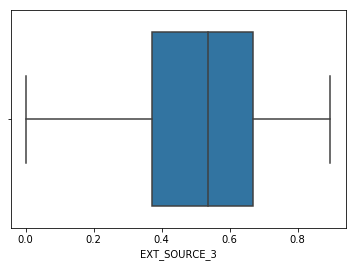

In [24]:
sns.boxplot(x='EXT_SOURCE_3',data=df_application)

In [25]:
#df_application['EXT_SOURCE_3'].fillna(df_application['EXT_SOURCE_3'].mean(),inplace=True)

######  7. AMT_REQ_CREDIT_BUREAU_HOUR is having around 13% missing values. Most of the values are either 0,1 or 2. So we cannot just impute the variable with mode. We feel it can replaced with 1 just to be on the safe side that the applicant could've called atlease once.

In [26]:
#df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

In [27]:
df['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].astype(int) ## Count column was shown as float so its converted to int.
df['DAYS_REGISTRATION']=df['DAYS_REGISTRATION'].astype(int) ## Number of days was shows as float

## Outlier corrections

In [28]:
df[['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']].describe(percentiles=[.25,.5,.75,.9,.95,.96,.97,.98,.99])

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE
count,307499.000000,3.075110e+05,3.075110e+05,3.072330e+05
mean,27108.573909,5.990260e+05,1.687979e+05,5.383962e+05
std,14493.737315,4.024908e+05,2.371231e+05,3.694465e+05
min,1615.500000,4.500000e+04,2.565000e+04,4.050000e+04
25%,16524.000000,2.700000e+05,1.125000e+05,2.385000e+05
50%,24903.000000,5.135310e+05,1.471500e+05,4.500000e+05
75%,34596.000000,8.086500e+05,2.025000e+05,6.795000e+05
90%,45954.000000,1.133748e+06,2.700000e+05,1.093500e+06
95%,53325.000000,1.350000e+06,3.375000e+05,1.305000e+06
96%,55624.500000,1.436850e+06,3.600000e+05,1.350000e+06


From the above matrix, we can clearly observe that after **95%**, these variables having significant outliers and we have to address this issue before proceeding with the analysis.

#### 1. Annuity amount

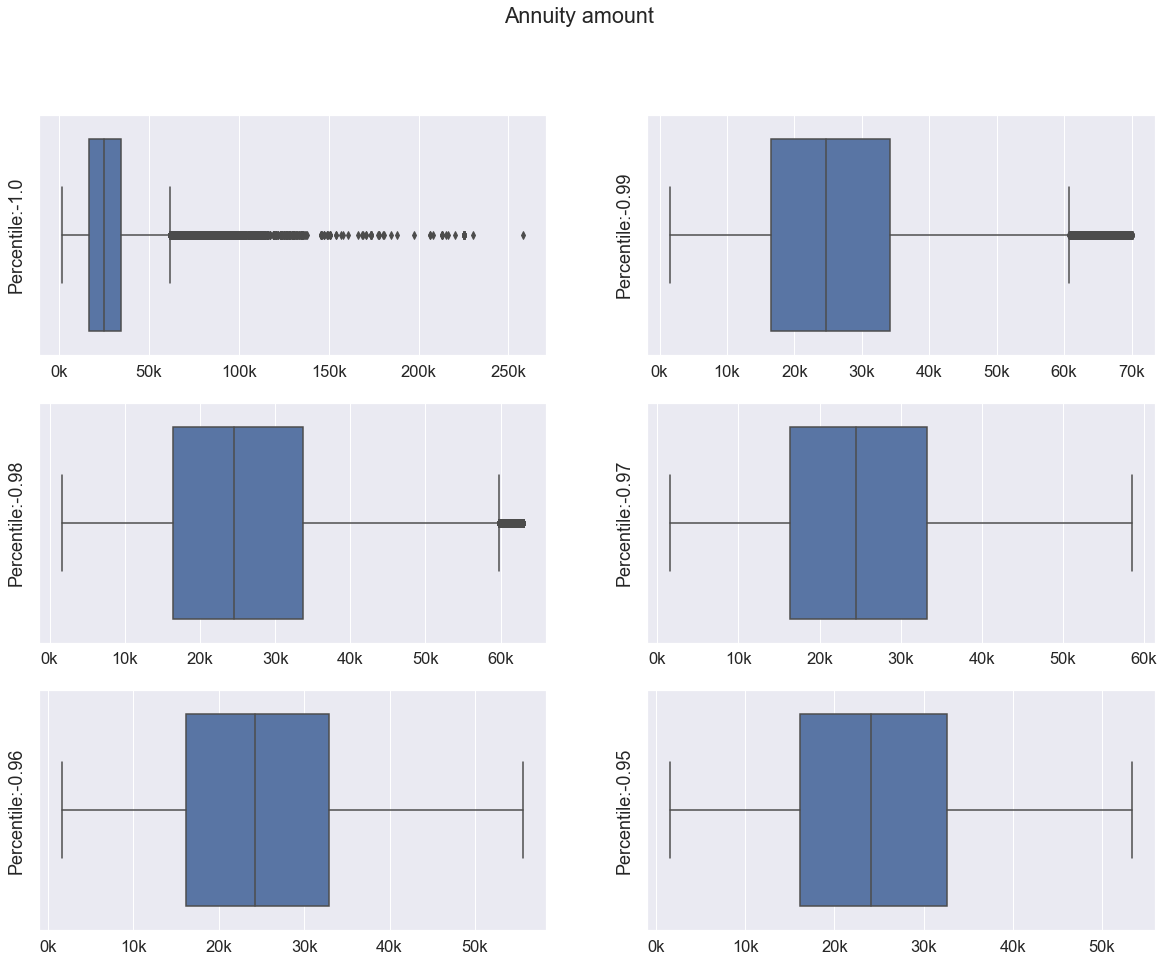

In [29]:
plt.figure(figsize=(20, 15))
j=1
sns.set(font_scale=1.5)
for i in range (100,94,-1):
    #plt.figure(j,figsize=[8,6])
    plt.subplot(3,2,j)
    p=df['AMT_ANNUITY'].quantile(i/100)
    g=sns.boxplot(x='AMT_ANNUITY',data=df.loc[df['AMT_ANNUITY']<=p,['AMT_ANNUITY']])
    plt.ylabel('Percentile:-{0}'.format(i/100))
    plt.xlabel('')
    plt.suptitle('Annuity amount')
    #plt.xticks(df['AMT_CREDIT'], rotation='vertical')
    xlabels = ['{:,.0f}'.format(x) + 'k' for x in g.get_xticks()/1000]
    g.set_xticklabels(xlabels)
    j+=1

From the boxplots, we could figure out that outliers are lying only beyond 97%. So we are capping the numerical column, AMT_ANNUITY at 97%

In [30]:
p=df['AMT_ANNUITY'].quantile(0.97)
df.shape[0]-df.loc[df['AMT_ANNUITY']<=p,['AMT_ANNUITY']].shape[0] ## Checking how many rows will be capped as outliers.

9227

In [31]:
df.loc[df['AMT_ANNUITY']>p,['AMT_ANNUITY']]=p
df['AMT_ANNUITY'].describe()

count    307499.000000
mean      26711.622452
std       13064.006290
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max       58482.000000
Name: AMT_ANNUITY, dtype: float64

#### 2. Credit Amount

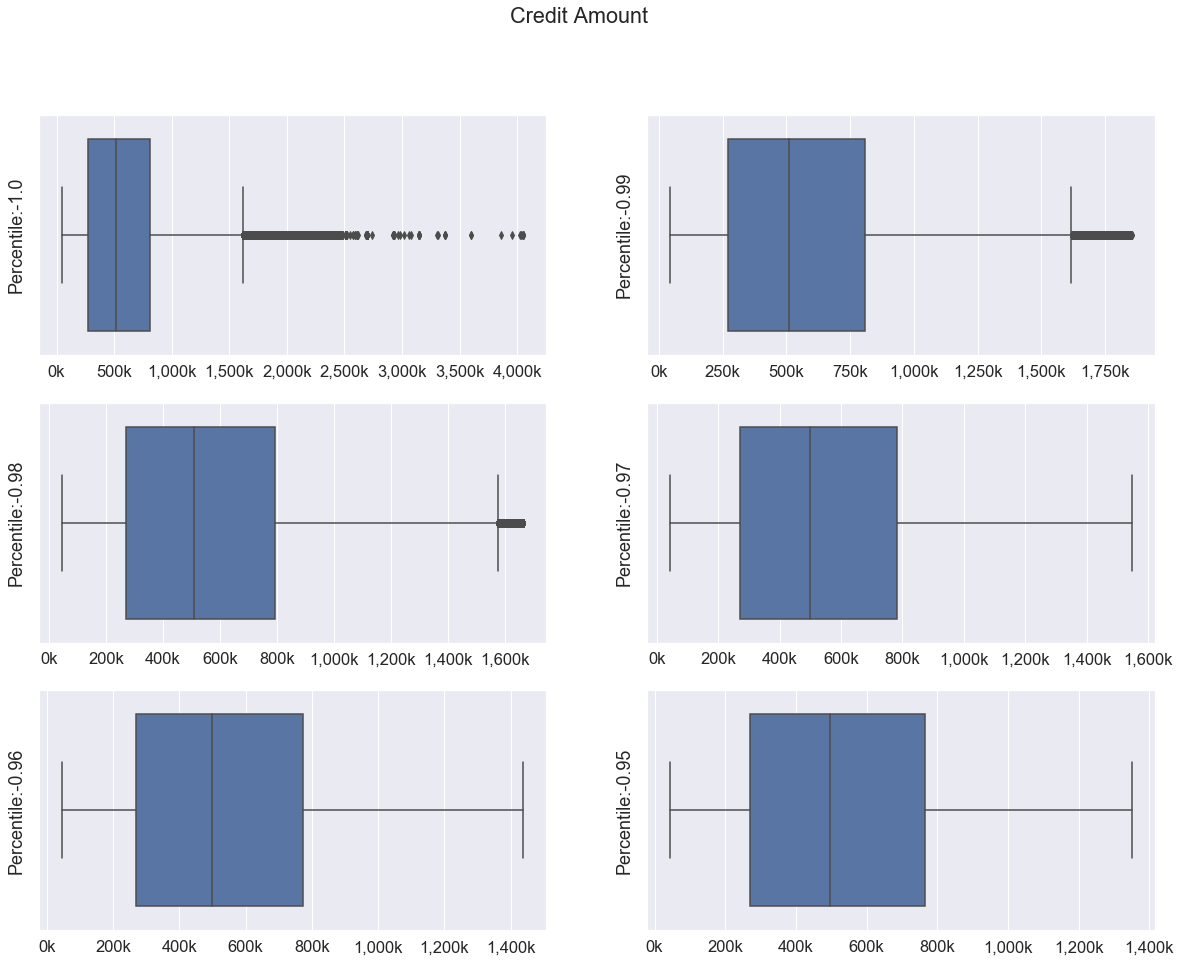

In [32]:
plt.figure(figsize=(20, 15))
j=1
sns.set(font_scale=1.5)
for i in range (100,94,-1):
    #plt.figure(j,figsize=[8,6])
    plt.subplot(3,2,j)
    p=df['AMT_CREDIT'].quantile(i/100)
    g=sns.boxplot(x='AMT_CREDIT',data=df.loc[df['AMT_CREDIT']<=p,['AMT_CREDIT']])
    plt.ylabel('Percentile:-{0}'.format(i/100))
    plt.xlabel('')
    plt.suptitle('Credit Amount')
    #plt.xticks(df['AMT_CREDIT'], rotation='vertical')
    xlabels = ['{:,.0f}'.format(x) + 'k' for x in g.get_xticks()/1000]
    g.set_xticklabels(xlabels)
    j+=1

Here also, we can see outliers are existing beyond 97%. So, AMT_CREDIT is capped at 97%

In [33]:
p=df['AMT_CREDIT'].quantile(0.97)
df.shape[0]-df.loc[df['AMT_CREDIT']<=p,['AMT_CREDIT']].shape[0] ## Checking how many rows will be capped as outliers.

8049

In [34]:
df.loc[df['AMT_CREDIT']>p,['AMT_CREDIT']]=p
df['AMT_CREDIT'].describe().apply(lambda x: format(x, '.2f'))

count     307511.00
mean      590657.66
std       375989.87
min        45000.00
25%       270000.00
50%       513531.00
75%       808650.00
max      1546020.00
Name: AMT_CREDIT, dtype: object

#### 3.Client Income

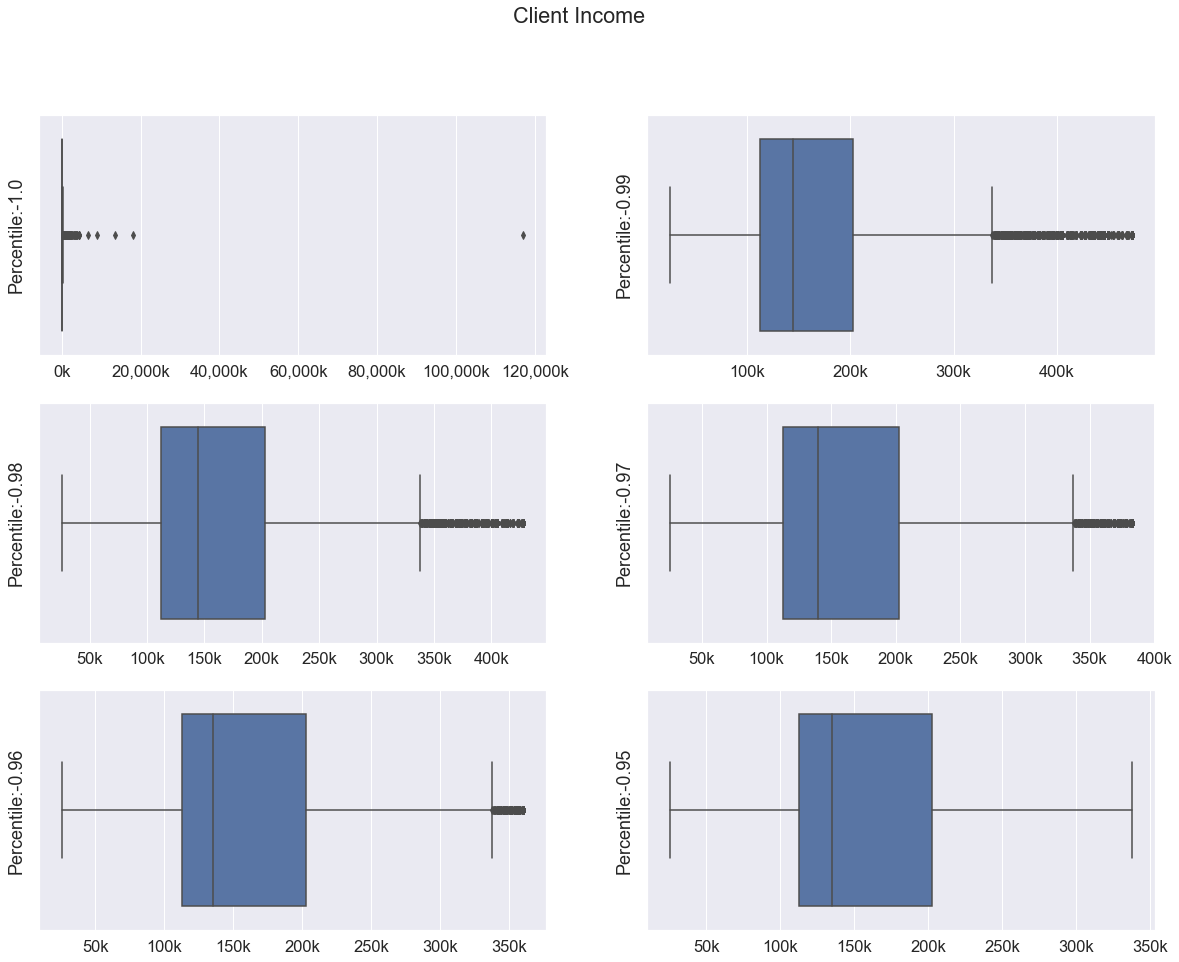

In [35]:
plt.figure(figsize=(20, 15))
j=1
sns.set(font_scale=1.5)
for i in range (100,94,-1):
    #plt.figure(j,figsize=[8,6])
    plt.subplot(3,2,j)
    p=df['AMT_INCOME_TOTAL'].quantile(i/100)
    g=sns.boxplot(x='AMT_INCOME_TOTAL',data=df.loc[df['AMT_INCOME_TOTAL']<=p,['AMT_INCOME_TOTAL']])
    plt.ylabel('Percentile:-{0}'.format(i/100))
    plt.xlabel('')
    plt.suptitle('Client Income')
    #plt.xticks(df['AMT_CREDIT'], rotation='vertical')
    xlabels = ['{:,.0f}'.format(x) + 'k' for x in g.get_xticks()/1000]
    g.set_xticklabels(xlabels)
    j+=1

There are no outliers beyond 95%. Hence, AMT_INCOME_TOTAL is capped at 95%.

In [36]:
p=df['AMT_INCOME_TOTAL'].quantile(0.97)
df.shape[0]-df.loc[df['AMT_INCOME_TOTAL']<=p,['AMT_INCOME_TOTAL']].shape[0] #Checking how many rows will be capped as outliers.

8290

In [37]:
df.loc[df['AMT_INCOME_TOTAL']>p,['AMT_INCOME_TOTAL']]=p
df['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, '.2f'))

count    307511.00
mean     164325.55
std       77675.31
min       25650.00
25%      112500.00
50%      147150.00
75%      202500.00
max      382500.00
Name: AMT_INCOME_TOTAL, dtype: object

#### 4.Value of Collateral

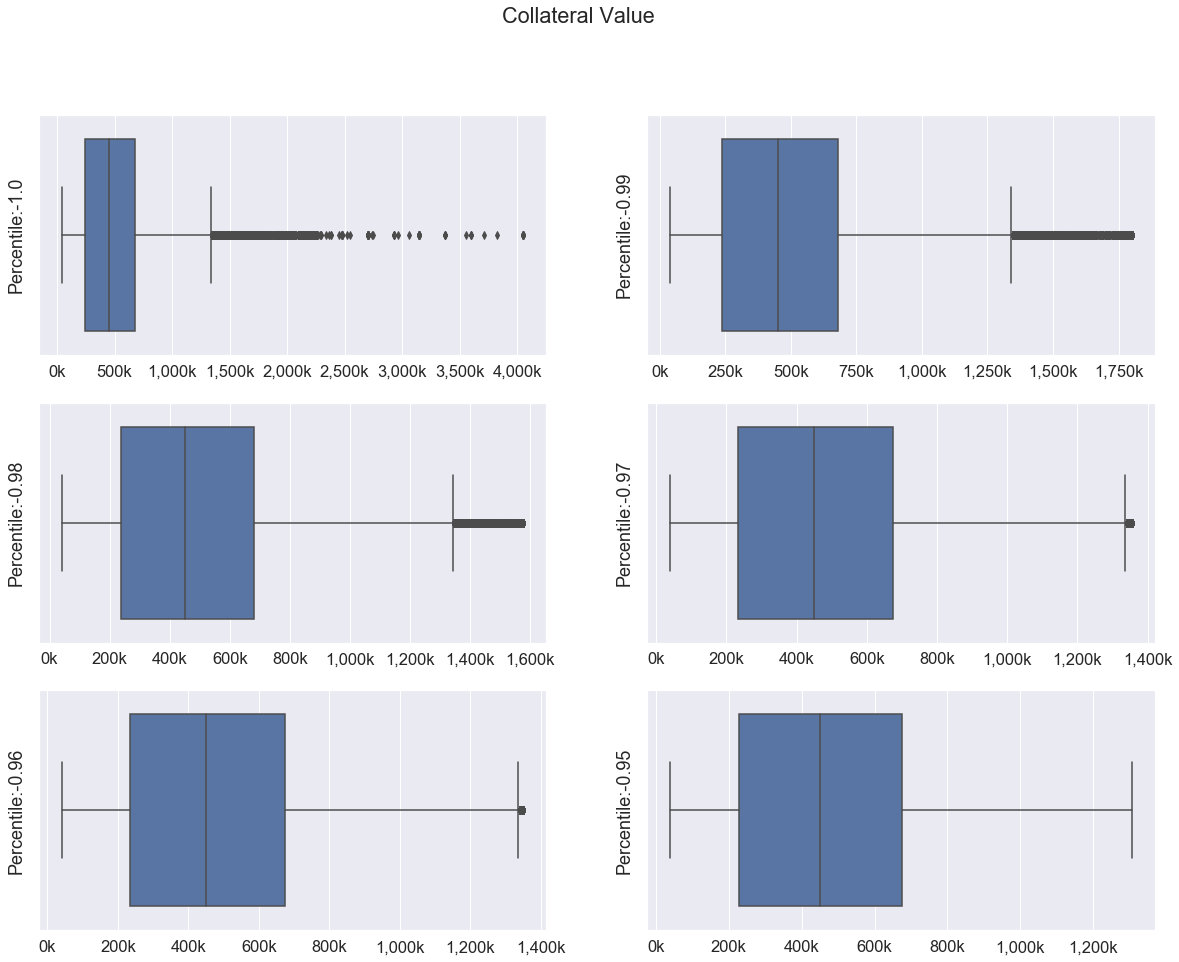

In [38]:
plt.figure(figsize=(20, 15))
j=1
sns.set(font_scale=1.5)
for i in range (100,94,-1):
    #plt.figure(j,figsize=[8,6])
    plt.subplot(3,2,j)
    p=df['AMT_GOODS_PRICE'].quantile(i/100)
    g=sns.boxplot(x='AMT_GOODS_PRICE',data=df.loc[df['AMT_GOODS_PRICE']<=p,['AMT_GOODS_PRICE']])
    plt.ylabel('Percentile:-{0}'.format(i/100))
    plt.xlabel('')
    plt.suptitle('Collateral Value')
    xlabels = ['{:,.0f}'.format(x) + 'k' for x in g.get_xticks()/1000]
    g.set_xticklabels(xlabels)
    j+=1

There are no outliers beyond .95 and hence, we are capping the values at 95%

In [39]:
p=df['AMT_GOODS_PRICE'].quantile(0.97)
df.shape[0]-df.loc[df['AMT_GOODS_PRICE']<=p,['AMT_GOODS_PRICE']].shape[0] #Checking how many rows will be capped as outliers.

8836

In [40]:
df.loc[df['AMT_GOODS_PRICE']>p,['AMT_GOODS_PRICE']]=p
df['AMT_GOODS_PRICE'].describe().apply(lambda x: format(x, '.2f'))

count     307233.00
mean      528490.66
std       338523.94
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      1354500.00
Name: AMT_GOODS_PRICE, dtype: object

Now once the required data quality issues have been addressed , we can proceed with to perform our analysis on the dataset.

#### Binning of continuous variables

We have decided to consider Income and Loan Credit columns for showcasing the binning of continuous variables.

In [41]:
df['Credit_Bin']=pd.cut(df['AMT_CREDIT'],5)
l=df['Credit_Bin'].unique()
d={l[0]:'Low',l[1]:'Very High',l[2]:'Very Low',l[3]:'High',l[4]:'Medium'}
df['Credit_Bin']=df['Credit_Bin'].apply(lambda x:d[x])
df['Credit_Bin'].value_counts()

Very Low     106274
Low           85412
Medium        61772
High          28965
Very High     25088
Name: Credit_Bin, dtype: int64

In [42]:
df['Income_Bin']=pd.cut(df['AMT_INCOME_TOTAL'],5)
l=df['Income_Bin'].unique()
d={l[0]:'Medium',l[1]:'High',l[2]:'Very Low',l[3]:'Low',l[4]:'Very High'}
df['Income_Bin']=df['Income_Bin'].apply(lambda x:d[x])
df['Income_Bin'].value_counts()

Low          127101
Medium        74834
Very Low      59976
High          23512
Very High     22088
Name: Income_Bin, dtype: int64

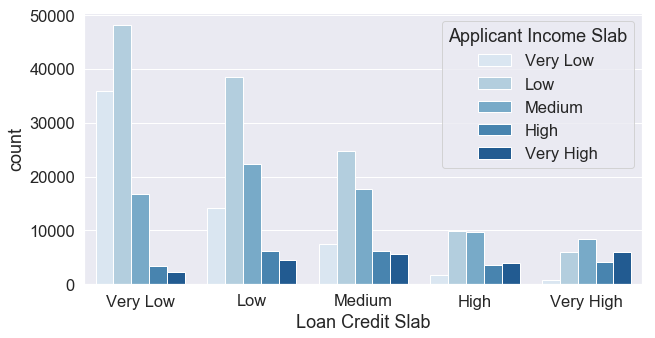

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Credit_Bin',hue='Income_Bin',data=df,palette='Blues')
plt.xlabel('Loan Credit Slab')
plt.legend(title='Applicant Income Slab')
#plt.xticks(rotation=45)

Some interesting points we can note from this is that:
1.  Most of loans applied are in the Very Low and Low categories, and the highest applicants in both such cases have low income slabs.
2.  Most applicants have either low salary or medium salary, followed by people with very low salary.
3.  Highest applicants in Very High loan category are from the Medium salary slab.

## Analysis
### Data Imbalance Check

In [44]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [45]:
df['TARGET'].value_counts()[0]/df.shape[0]*100

91.92711805431351

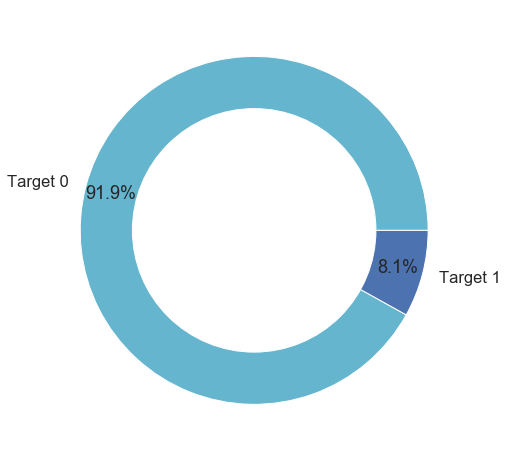

In [46]:
plt.figure(figsize=(10, 8))
#order=df_0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
count=df['TARGET'].value_counts()
plt.pie(count,labels=['Target 0','Target 1'],autopct='%1.1f%%',colors=['c','b'],pctdistance=0.85)
#plt.xticks(rotation=90)
#plt.title('Target 0')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


From the graph it is very clear that the data is very imbalanced. 91.9% of the applicants donot have any payment difficulties. Only the remaining 8.1% of the applicants are having some history of payment difficulty.

In [47]:
df['YEARS_BIRTH']=df['DAYS_BIRTH'].apply(lambda x:-round(x/365)) # Changing the field from Days to Years. 
df['YEARS_EMPLOYED']=df['DAYS_EMPLOYED'].apply(lambda x:-round(x/365))
df['YEARS_REGISTRAION']=df['DAYS_REGISTRATION'].apply(lambda x:-round(x/365))

In [48]:
df.loc[df['YEARS_EMPLOYED']==-1001,:]['NAME_INCOME_TYPE'].value_counts()#Checks what represents the value -1001 in DAYS_EMPLOYED

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

##### Next step is to split the data by TARGET 0 and 1.

In [49]:
df_0=df.loc[df['TARGET']==0,:]
df_1=df.loc[df['TARGET']==1,:]

In [50]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_YEAR,Credit_Bin,Income_Bin,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRAION
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,1,2,Business Entity Type 3,0.262949,1.0,Low,Medium,26,2,10
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,2,1,School,0.622246,0.0,Very High,High,46,3,3
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,1,2,Government,0.555912,0.0,Very Low,Very Low,52,1,12
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,2,2,Business Entity Type 3,0.650442,NaN,Very Low,Low,52,8,27
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,1,2,Religion,0.322738,0.0,Low,Low,55,8,12


In [51]:
df.dtypes

SK_ID_CURR                       int64
TARGET                          object
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int32
CNT_FAM_MEMBERS                  int32
REGION_RATING_CLIENT             int64
ORGANIZATION_TYPE               object
EXT_SOURCE_2                   float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Credit_Bin                    category
Income_Bin                    category
YEARS_BIRTH              

In [52]:
Cat_Columns=['CODE_GENDER','FLAG_OWN_CAR','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE']
Num_Columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','YEARS_BIRTH','EXT_SOURCE_2']

##### Univariate analysis for Categorical Variables

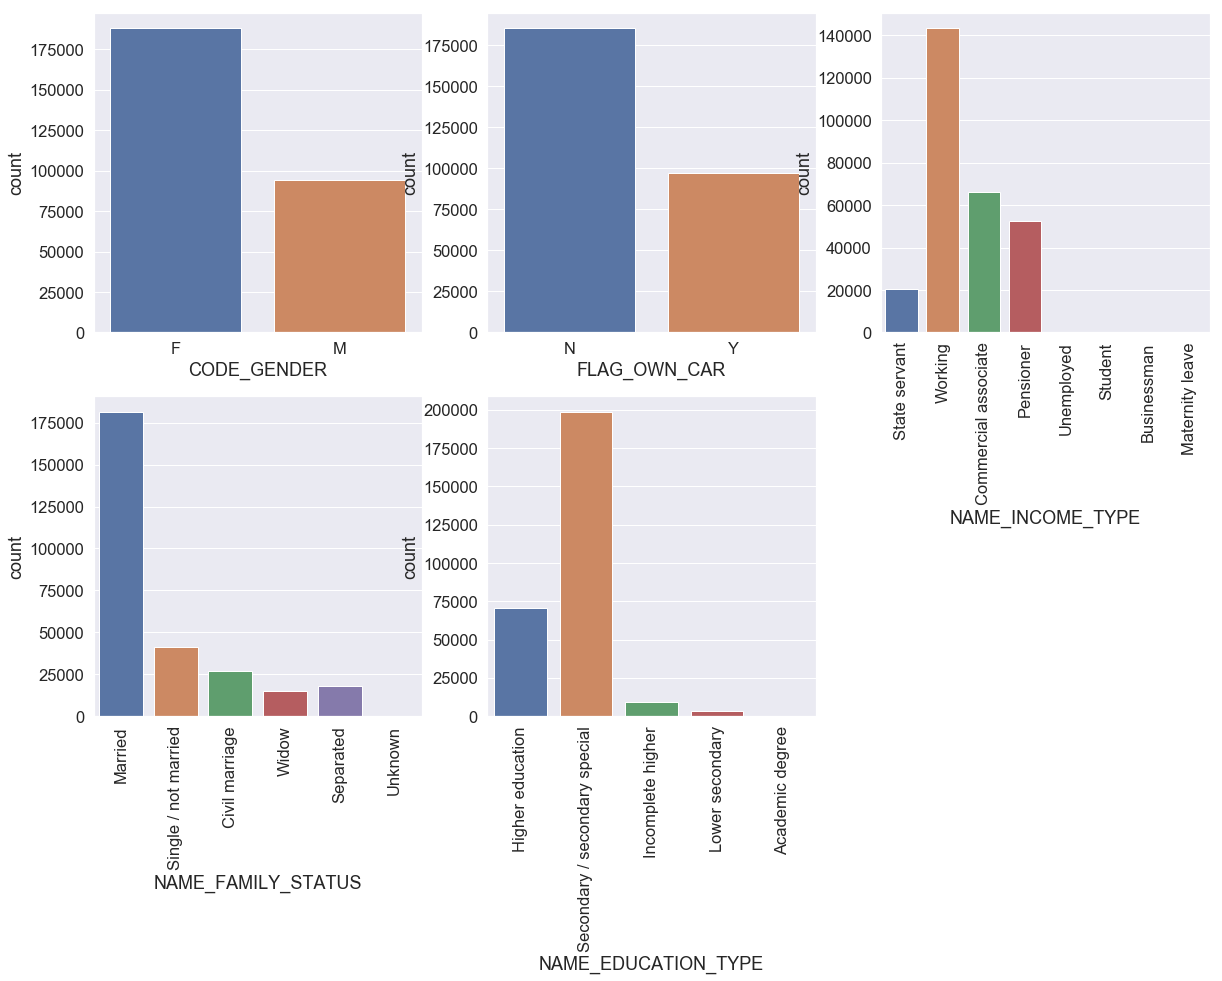

In [53]:
plt.figure(figsize=(20, 20))
j=1
for i in Cat_Columns:
    plt.subplot(3,3,j)
    sns.countplot(x=i,data=df_0)
    if j>2:
        plt.xticks(rotation=90)
    j+=1

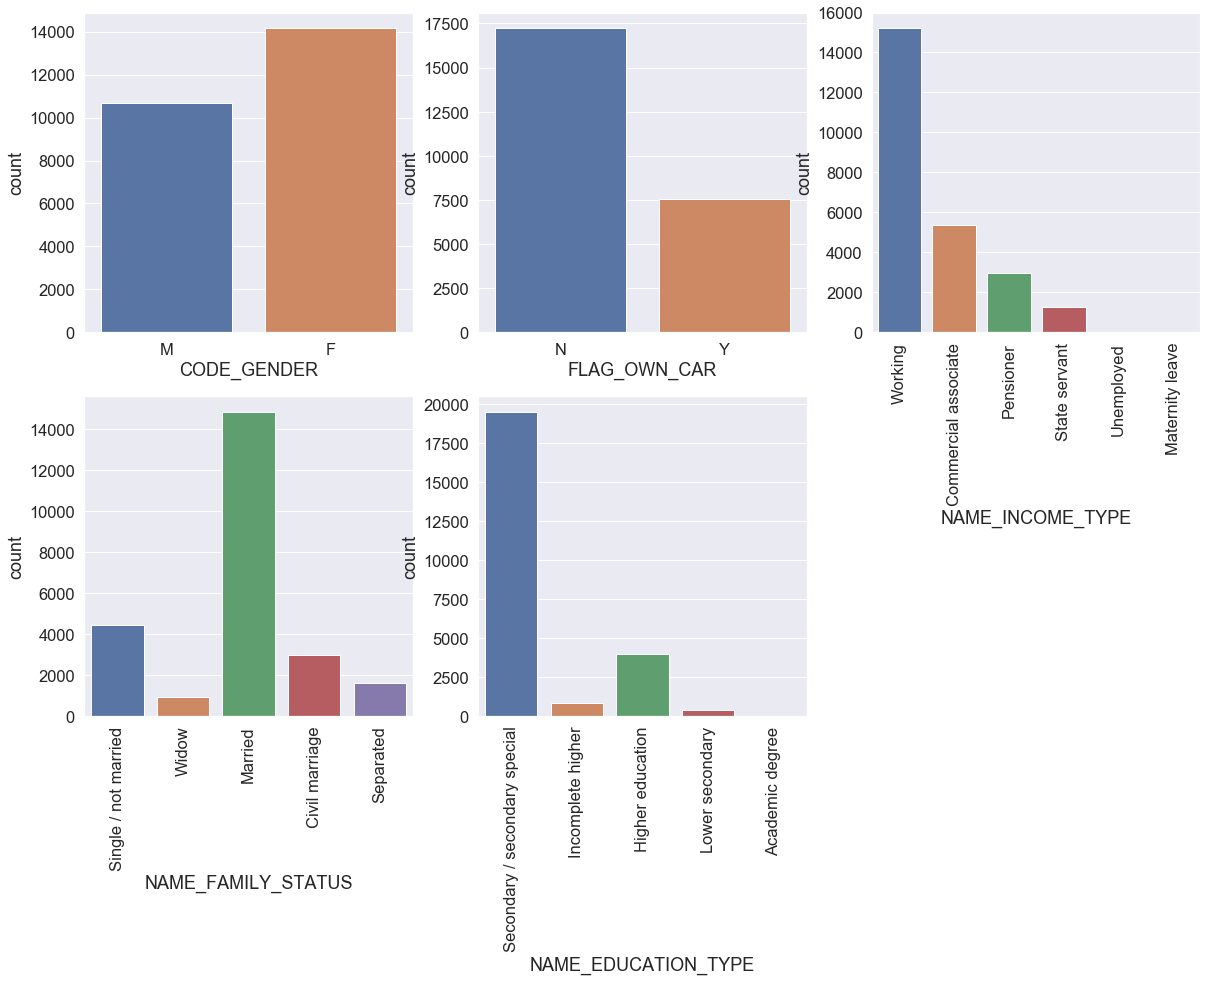

In [54]:
plt.figure(figsize=(20, 20))
j=1
for i in Cat_Columns:
    plt.subplot(3,3,j)
    sns.countplot(x=i,data=df_1)
    if j>2:
        plt.xticks(rotation=90)
    j+=1

The above graphs outline how these categorical variables are distributed across the dataframes df_0 and df_1. But since the data imbalance between the two is predominant; and since we are primarily using counts to show the distribution, we can't use these graphs to perform a proper comparison between the 2 dataframes. 

Hence, because of the data imbalance issue, We decided to use percentage of the value_counts instead of just counts, and then use bar graphs to plot the distribution. This will enable us to make proper comparisons between the 2 dataframes.

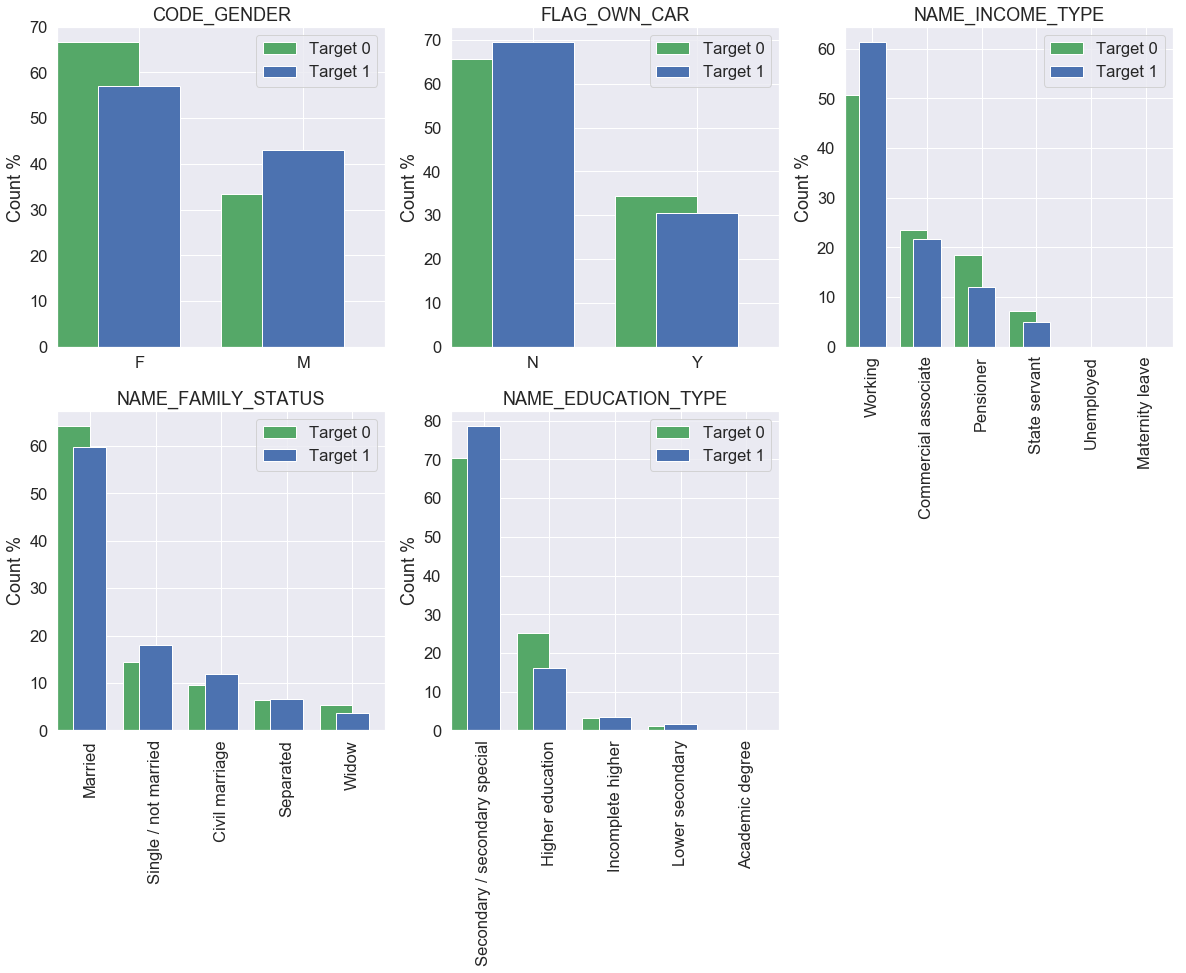

In [55]:
plt.figure(figsize=(20, 20))
j=1
for i in Cat_Columns:
    plt.subplot(3,3,j)
    x1=df_0[i]
    x2=df_1[i]
    (x1.value_counts()/x1.shape[0]*100).plot(kind='bar',color='g',position=1)
    (x2.value_counts()/x2.shape[0]*100).plot(kind='bar',color='b')
    plt.legend(('Target 0','Target 1'))
    plt.ylabel('Count %')
    plt.title(i)
    if j<=2:
        plt.xticks(rotation=0)
    j+=1

After examining the categorical plots we've noticed the following:
1.  There are more males having payment troubles than not, even though there are fewer male loan applicants.
2.  Pensioners defaulters are lower than non-defaulters.
3.  Majority of loan applicants are Working class.
4.  Single/ not married defaulters are more than non-defaulters.
5.  Married non-defaulters are higher than defaulters.
6.  People Owning Cars have fewer defaulters than non-defaulters.
7.  Married couples take more loan than the rest.
8.  Most the loan applicants have Secondary type education, followed by Higher education.
9.  Default rate is higher for applicants with just Secondary education.

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

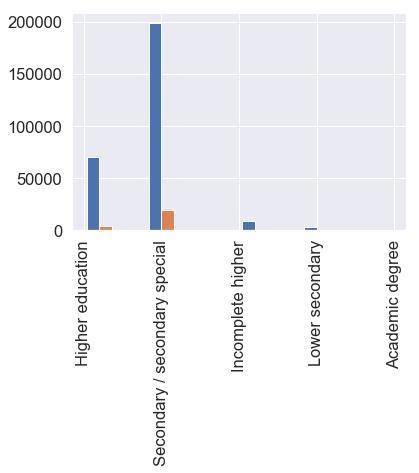

In [56]:
#x1=x1.value_counts()/x1.shape[0]*100
#x2=x2.value_counts()/x2.shape[0]*100
plt.hist([x1,x2])
#plt.xlabel(x1.index)
plt.xticks(rotation=90)

This is how the code will look like, if the we don't consider percentages. Thus justifying our approach

##### Univariate analysis for Numerical Variables

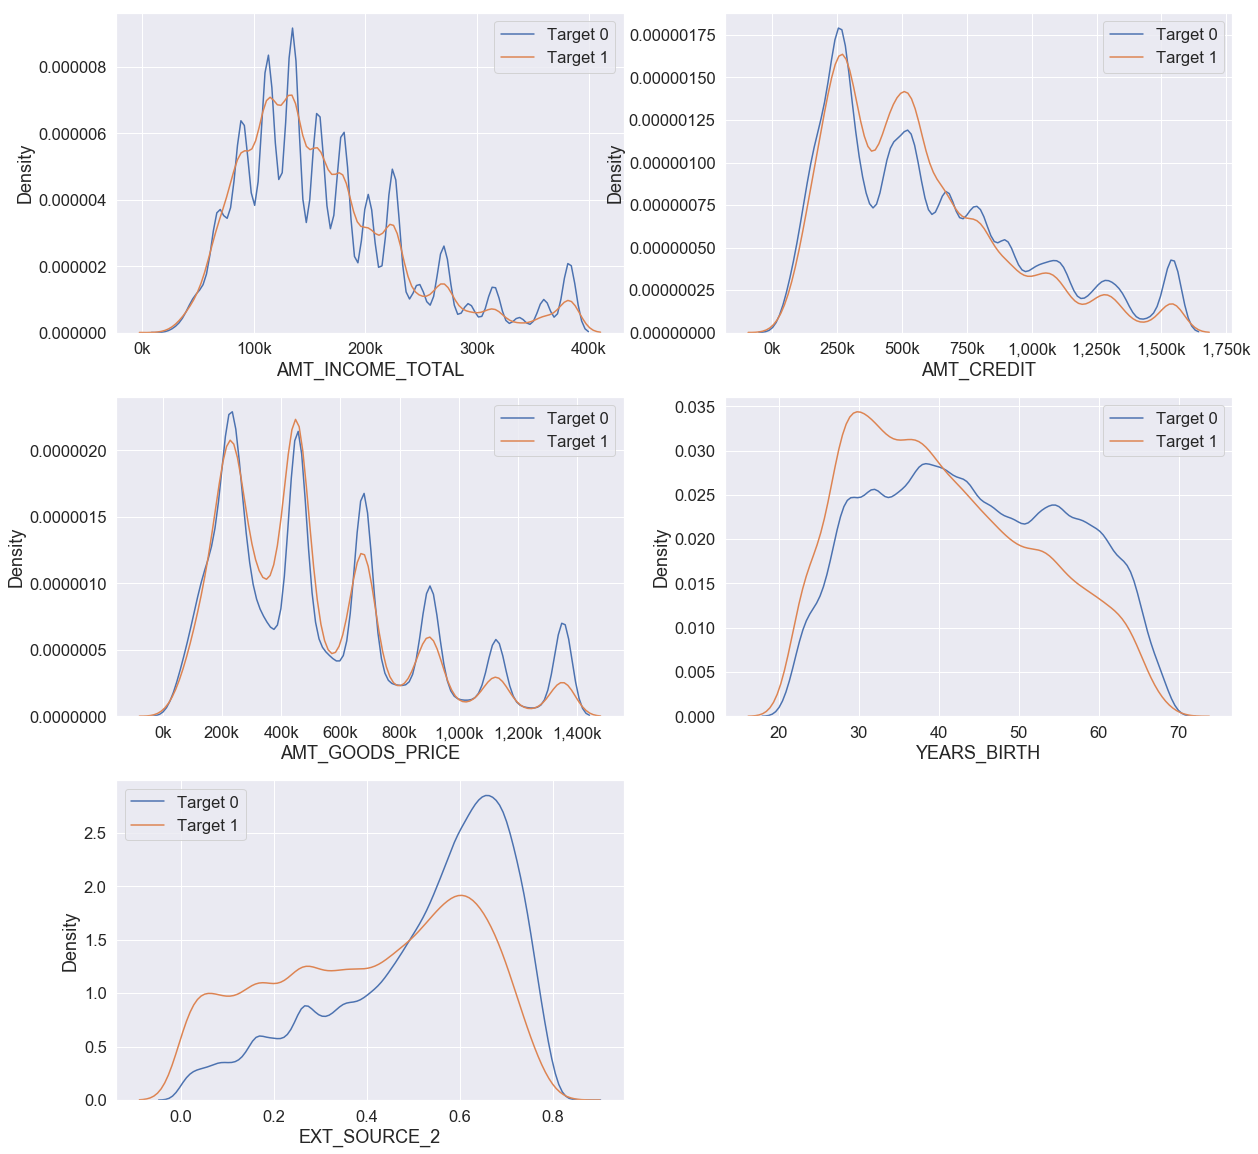

In [57]:
plt.figure(figsize=(20, 20))
j=1
for i in Num_Columns:
    plt.subplot(3,2,j)
    g1=sns.distplot(df_0[i],hist=False,label='0')
    g2=sns.distplot(df_1[i],hist=False,label='1')
    plt.ylabel('Density')
    plt.legend(('Target 0','Target 1'))
    if j<=3:
        xlabels = ['{:,.0f}'.format(x) + 'k' for x in g1.get_xticks()/1000]
        g1.set_xticklabels(xlabels)
    j+=1

Trends noted from numerical variables:
1.  Defaulters have lower credit ratings than non-defaulters. (As expected)
2.  There are more youngsters having higher payment issues.
3.  Number of high credit loans are lower.
4.  There are fewer people with very high income.
5.  Both defaulters and non-defaulters have almost the same Income-Goods-Credit distribution.

##### Top Correlated Variables

In [58]:
corr_columns=list(set(df.dtypes[df.dtypes!=object].index)-{'Income_Bin','Credit_Bin','TARGET','SK_ID_CURR','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_EMPLOYED','DAYS_REGISTRATION'})

In [59]:
corr_columns

['AMT_CREDIT',
 'CNT_FAM_MEMBERS',
 'YEARS_BIRTH',
 'REGION_RATING_CLIENT',
 'YEARS_REGISTRAION',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEARS_EMPLOYED',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'EXT_SOURCE_2']

Text(0.5, 1.0, 'Target 1')

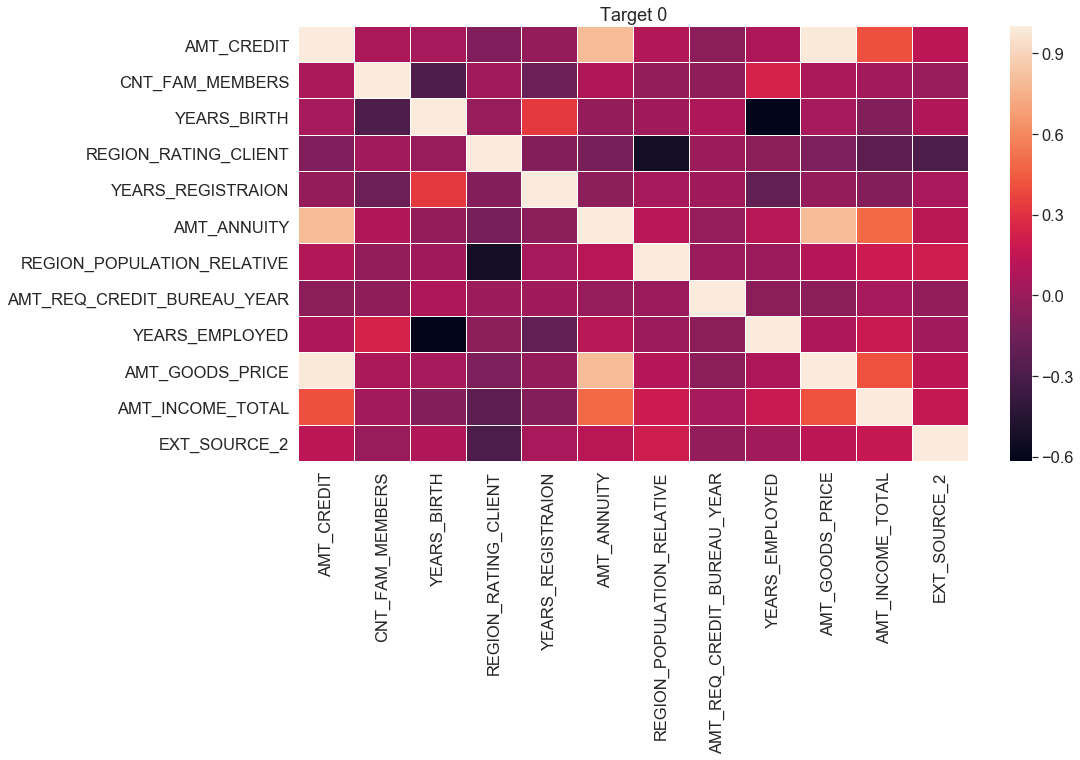

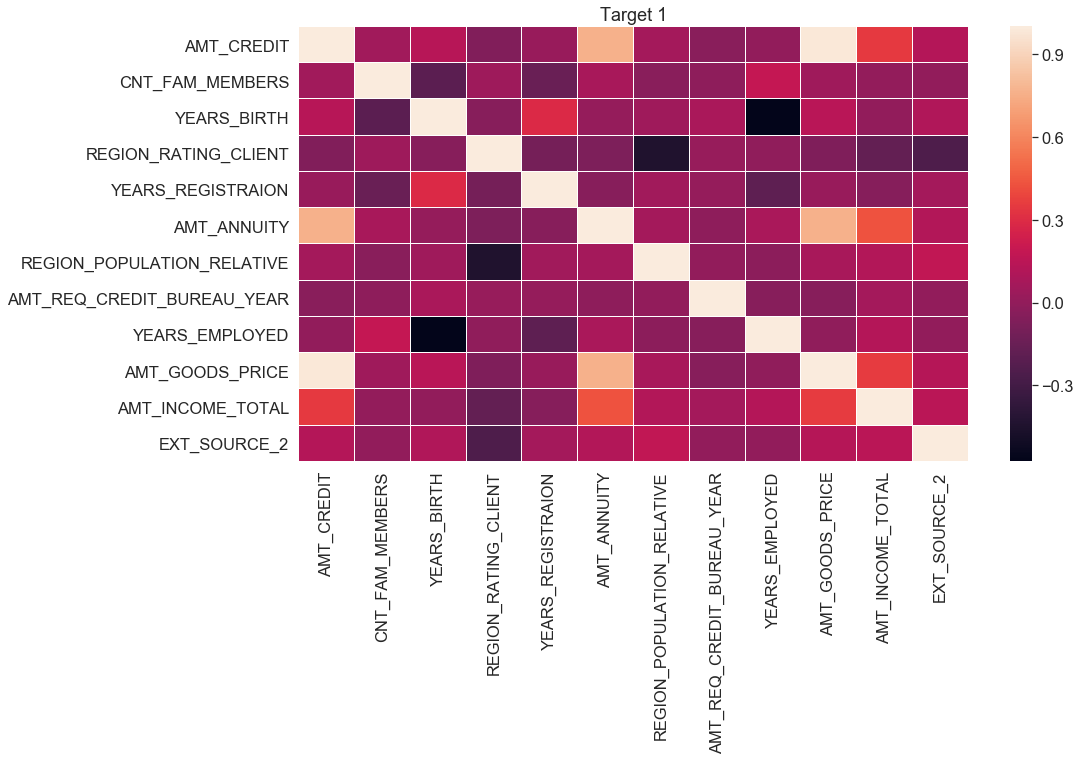

In [60]:
plt.figure(figsize=(15, 8))
corr_mat0 = df_0[corr_columns].corr()
sns.heatmap(corr_mat0, annot =False,linewidths=.1)
plt.title('Target 0')
plt.figure(figsize=(15, 8))
corr_mat1 = df_1[corr_columns].corr()
sns.heatmap(corr_mat1, annot =False,linewidths=.1)
plt.title('Target 1')

In [61]:
#corr_mat = newdf.corr()
corr = corr_mat0.where(np.triu(np.ones(corr_mat0.shape), k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']
corr.dropna(subset = ['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False)[:10]
## TARGET 0

,VAR1,VAR2,CORR
108,AMT_GOODS_PRICE,AMT_CREDIT,0.986680
113,AMT_GOODS_PRICE,AMT_ANNUITY,0.799405
60,AMT_ANNUITY,AMT_CREDIT,0.796758
98,YEARS_EMPLOYED,YEARS_BIRTH,0.617763
75,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,0.539005
125,AMT_INCOME_TOTAL,AMT_ANNUITY,0.489586
129,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.416020
120,AMT_INCOME_TOTAL,AMT_CREDIT,0.411285
50,YEARS_REGISTRAION,YEARS_BIRTH,0.332980
135,EXT_SOURCE_2,REGION_RATING_CLIENT,0.291624


In [62]:
corr = corr_mat1.where(np.triu(np.ones(corr_mat1.shape), k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns = ['VAR1', 'VAR2', 'CORR']
corr.dropna(subset = ['CORR'], inplace = True)
corr.sort_values('CORR', ascending = False)[:10]
## TARGET 1

,VAR1,VAR2,CORR
108,AMT_GOODS_PRICE,AMT_CREDIT,0.982472
113,AMT_GOODS_PRICE,AMT_ANNUITY,0.761597
60,AMT_ANNUITY,AMT_CREDIT,0.761415
98,YEARS_EMPLOYED,YEARS_BIRTH,0.574684
75,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,0.443236
125,AMT_INCOME_TOTAL,AMT_ANNUITY,0.432260
129,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.355471
120,AMT_INCOME_TOTAL,AMT_CREDIT,0.353264
50,YEARS_REGISTRAION,YEARS_BIRTH,0.288783
135,EXT_SOURCE_2,REGION_RATING_CLIENT,0.250519


**Top 10 correlated variables are the same for both Target1 and Target0. But the extent of correlation is different for each.**
1.  Loan Credit amount is highly correlated with the value of the collateral goods.
2.  Annuity has good correlation with Loan Amount. Hence as loan amount increase, annuity amount will also increase.
3.  Age of the employee and years employed has a moderate correlation.
4.  Highly populated regions have better region rating.
5.  Annuity amount has a decent correlation with Income of the applicant.  

**Correlation matrix is not the absolute method to distinguish which variables has the highest impact in identifying who will default or not.**

##### Bivariate Analysis

Text(0.5, 0.98, 'Gender vs Car Ownership')

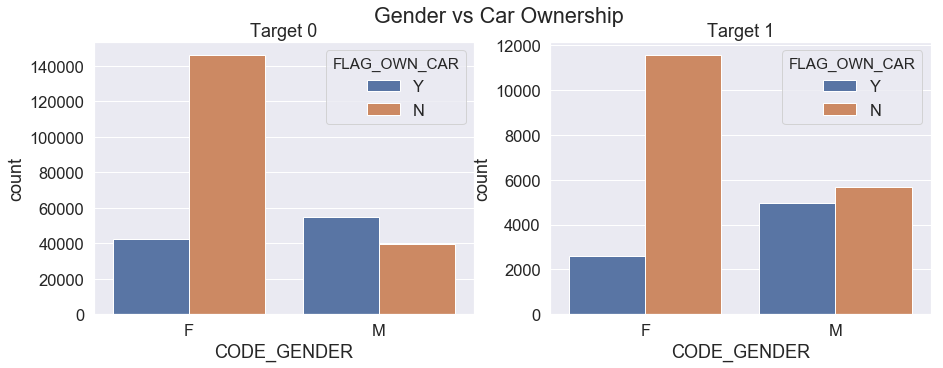

In [63]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
order=df_0['CODE_GENDER'].value_counts().sort_values(ascending=False).index
sns.countplot(x='CODE_GENDER',hue='FLAG_OWN_CAR',data=df_0,order=order,hue_order=['Y','N'])
#plt.xticks(rotation=90)
plt.title('Target 0')
plt.subplot(1,2,2)
order=df_1['CODE_GENDER'].value_counts().sort_values(ascending=False).index
sns.countplot(x='CODE_GENDER',hue='FLAG_OWN_CAR',data=df_1,order=order,hue_order=['Y','N'])
#plt.xticks(rotation=90)
plt.title('Target 1')
plt.suptitle('Gender vs Car Ownership')

Lesser number of males who own cars have loan repayment troubles.

Text(0.5, 0.98, 'Credit Rating vs Gender')

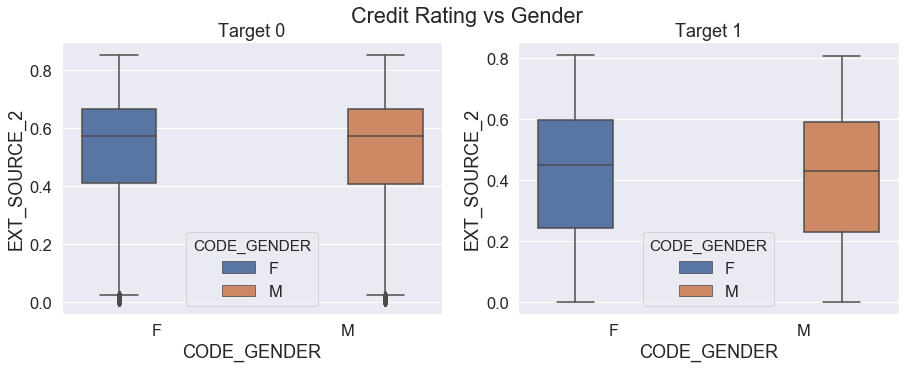

In [64]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
order=df_0['CODE_GENDER'].value_counts().sort_values(ascending=False).index
sns.boxplot(x='CODE_GENDER',y='EXT_SOURCE_2',data=df_0,hue='CODE_GENDER',hue_order=['F','M'],order=order)
plt.title('Target 0')
plt.subplot(1,2,2)
order=df_1['CODE_GENDER'].value_counts().sort_values(ascending=False).index
sns.boxplot(x='CODE_GENDER',y='EXT_SOURCE_2',data=df_1,hue='CODE_GENDER',hue_order=['F','M'],order=order)
plt.title('Target 1')
plt.suptitle('Credit Rating vs Gender')

**This proves that credit rating does not depend on gender but on the loan repayment capability of the applicant.**

Text(0.5, 0.98, 'Income Type vs Age')

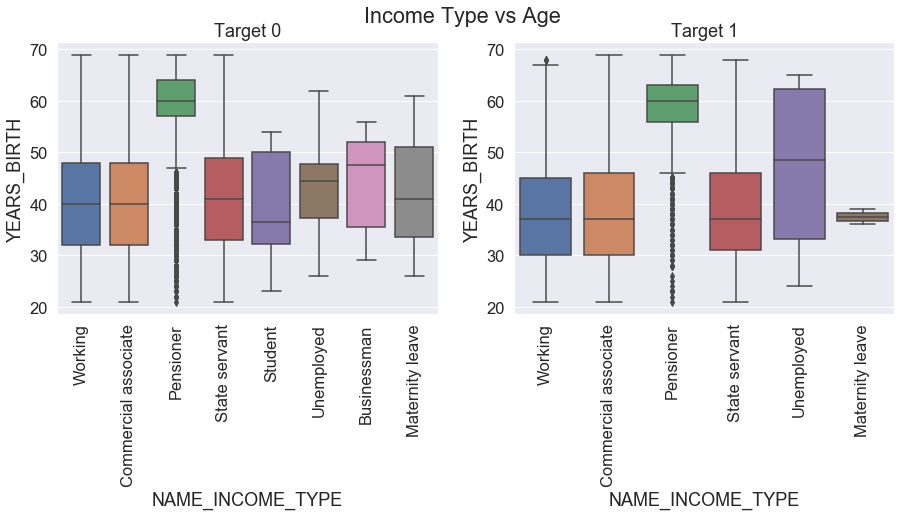

In [65]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
order=df_0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
sns.boxplot(x='NAME_INCOME_TYPE',y='YEARS_BIRTH',data=df_0,order=order)
plt.xticks(rotation=90)
plt.title('Target 0')
plt.subplot(1,2,2)
order=df_1['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
sns.boxplot(x='NAME_INCOME_TYPE',y='YEARS_BIRTH',data=df_1,order=order)
plt.title('Target 1')
plt.xticks(rotation=90)
plt.suptitle('Income Type vs Age')

*  Businessmen have highest age cap among all the salaried applicants.
*  Giving loans to Unemployed applicants with more 50 Years of age is the riskiest.
*  Most of the Working applicants are of the age group 30-50 Yrs.

Text(0.5, 0.98, 'Income Type vs Credit Rating')

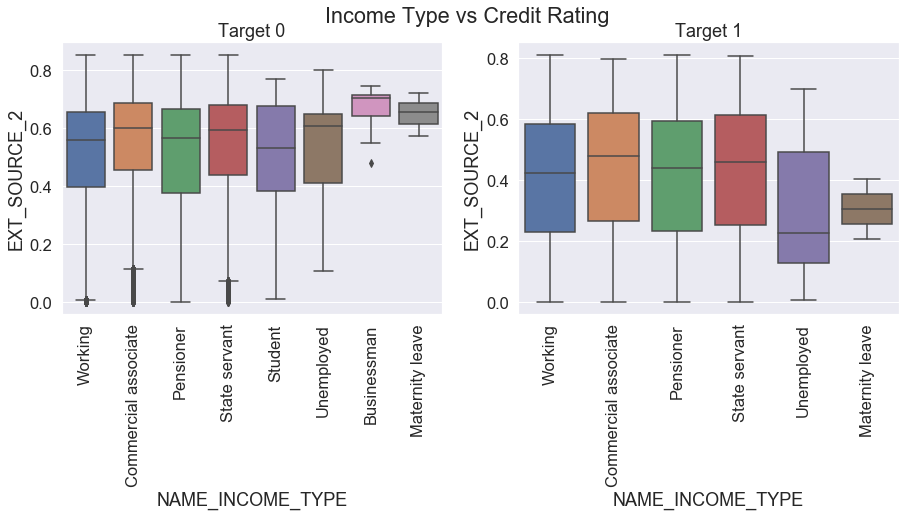

In [66]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
order=df_0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
sns.boxplot(x='NAME_INCOME_TYPE',y='EXT_SOURCE_2',data=df_0,order=order)
plt.title('Target 0')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
order=df_1['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
sns.boxplot(x='NAME_INCOME_TYPE',y='EXT_SOURCE_2',data=df_1,order=order)
plt.title('Target 1')
plt.xticks(rotation=90)
plt.suptitle('Income Type vs Credit Rating')

* Businessmen have the highest credit ratings.
* Unemployed applicants with less than 0.4 credit rating are very risky candidates.
* Women on Maternity leave, but with less credit ratings are risky applicants.

Text(0.5, 0.98, 'Income Type vs Gender')

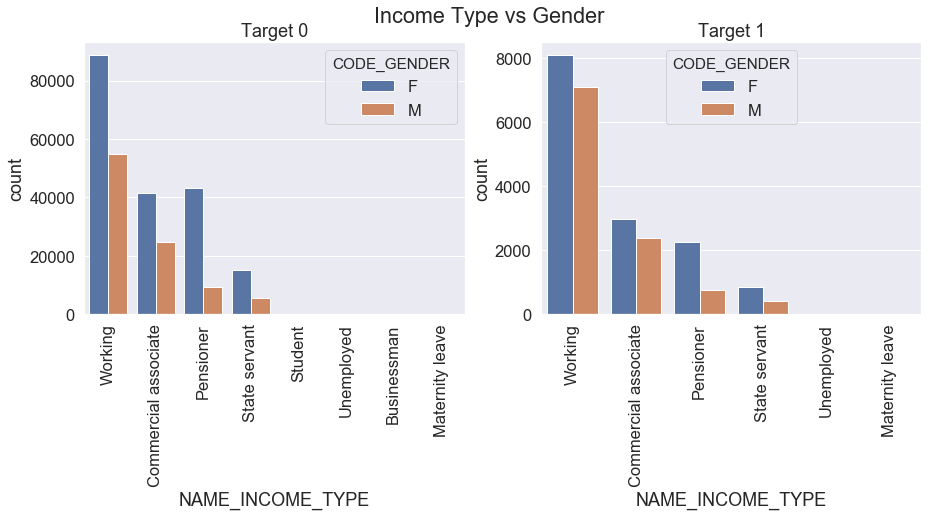

In [67]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
order=df_0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=df_0,order=order,hue_order=['F','M'])
plt.xticks(rotation=90)
plt.title('Target 0')
plt.subplot(1,2,2)
order=df_1['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=df_1,order=order,hue_order=['F','M'])
plt.xticks(rotation=90)
plt.title('Target 1')
plt.suptitle('Income Type vs Gender')

There are more female applicants than males, from each income type.

In [68]:
Cat_Columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE']

### Previous Application

In [69]:
df_previous=pd.read_csv('C:\\Users\\kjoseph\\Desktop\\Upgrad\\Case Study\\previous_application.csv')

In [70]:
df_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [71]:
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df_previous.shape

(1670214, 37)

In [73]:
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

Both the files, current_application and previous_application have SK_ID_CURR as common and we can use this column as the key to join the two dataframes.

In [74]:
df_joined=df_previous.merge(df,how='left',left_on='SK_ID_CURR',right_on='SK_ID_CURR') #Left join on SK_ID_CURR

But for our analysis, we are only considering each files seperately.

In [75]:
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
cols=['SK_ID_CURR','NAME_CONTRACT_STATUS','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_DOWN_PAYMENT','NAME_CLIENT_TYPE','AMT_APPLICATION','CHANNEL_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_TYPE']

In [77]:
len(cols)

11

In [78]:
df_2=df_previous[cols]

In [79]:
df_2.head()

,SK_ID_CURR,NAME_CONTRACT_STATUS,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_DOWN_PAYMENT,NAME_CLIENT_TYPE,AMT_APPLICATION,CHANNEL_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_CONTRACT_TYPE
0,271877,Approved,17145.0,1730.430,17145.0,0.0,Repeater,17145.0,Country-wide,SATURDAY,Consumer loans
1,108129,Approved,679671.0,25188.615,607500.0,NaN,Repeater,607500.0,Contact center,THURSDAY,Cash loans
2,122040,Approved,136444.5,15060.735,112500.0,NaN,Repeater,112500.0,Credit and cash offices,TUESDAY,Cash loans
3,176158,Approved,470790.0,47041.335,450000.0,NaN,Repeater,450000.0,Credit and cash offices,MONDAY,Cash loans
4,202054,Refused,404055.0,31924.395,337500.0,NaN,Repeater,337500.0,Credit and cash offices,THURSDAY,Cash loans


**What is the loan application status from previous submission ??**

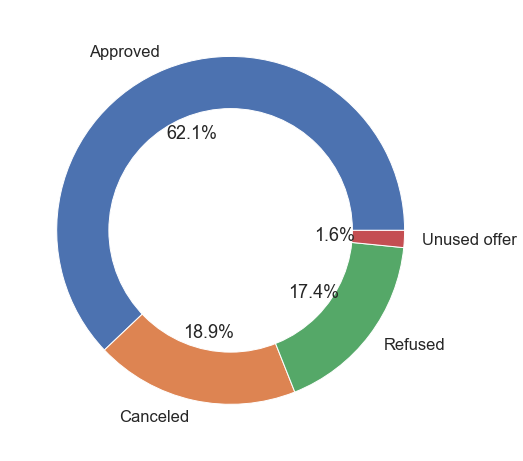

In [80]:
plt.figure(figsize=(20, 8))
#order=df_0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
count=df_2['NAME_CONTRACT_STATUS'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%')
#plt.xticks(rotation=90)
#plt.title('Target 0')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


62% of the previous applications were approved and only 17% of the loan applicants were refused.

**Which days had the maximum number of loan applications ?**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

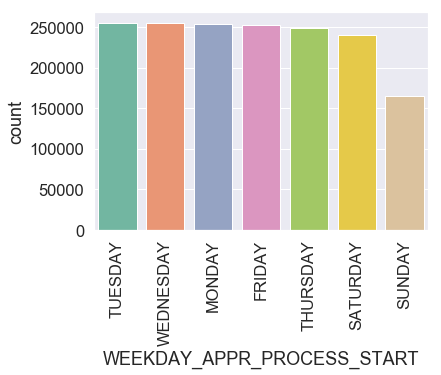

In [81]:
order=df_2['WEEKDAY_APPR_PROCESS_START'].value_counts().sort_values(ascending=False).index
sns.countplot(x='WEEKDAY_APPR_PROCESS_START',data=df_2,palette='Set2',order=order)
plt.xticks(rotation=90)

Sunday is having the least number of applications and almost 15% along Tue,Wed,Mon,Fri and Thrs each. So generally, weekdays are busier than weekends.

**Which type loans are typically accepted and which are rejected ?** 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

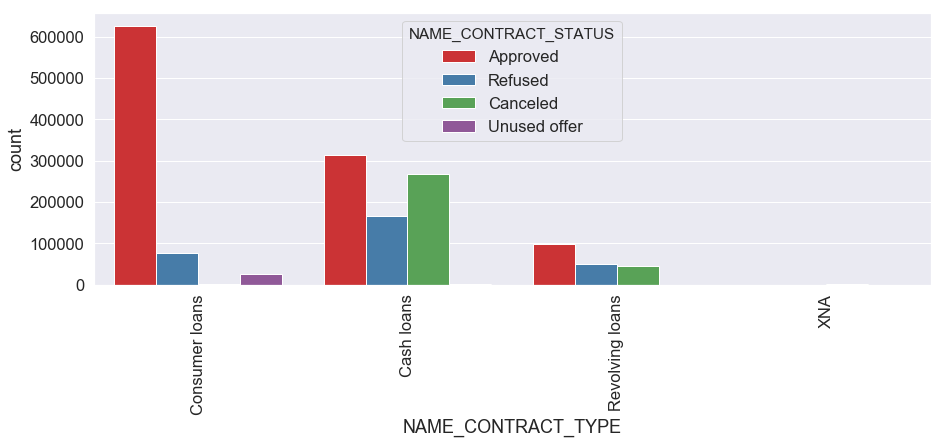

In [82]:
plt.figure(figsize=(15, 5))
sns.countplot(x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS',data=df_2,palette='Set1')
plt.xticks(rotation=90)

1.  Cash loans have the highest rejected percentage.
2.  Cash loans also have the highest cancellation percentage.
3.  Most of the loans applied are consumer loans.
4.  Consumer loans have the least chance of getting cancelled.
5.  Only a small percentage of Consumer loans are refused.

**How does loan approval varies with client type?**

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

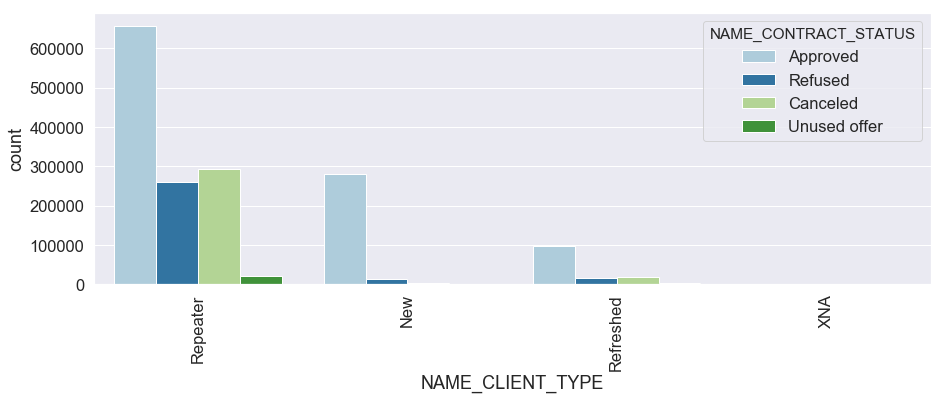

In [83]:
plt.figure(figsize=(15, 5))
sns.countplot(x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS',data=df_2,palette='Paired')
plt.xticks(rotation=90)

* New clients have lowest chance of loan getting refused.
* Majority of the loan applicants are Repeater type.
* Repeater clients has the highest chance of loan getting cancelled.
* Repeater clients has nearly 40% chance of application getting rejected.

**Which clients apply for the biggest loans ?**

Text(0.5, 1.0, 'Target 0')

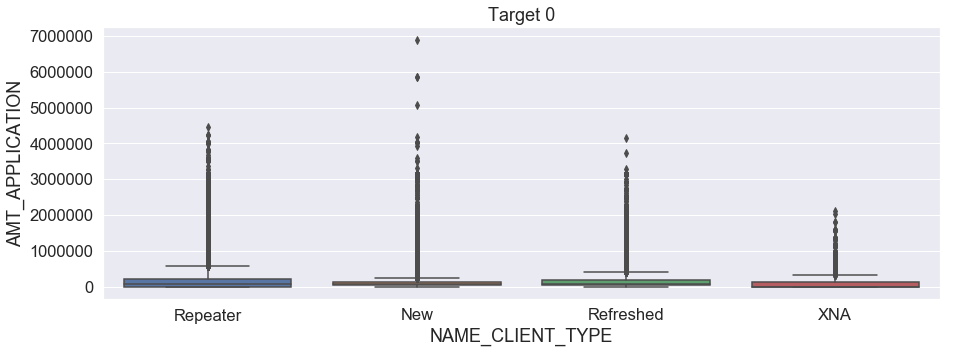

In [84]:
plt.figure(figsize=(15, 5))
#order=df_0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
sns.boxplot(y='AMT_APPLICATION',x='NAME_CLIENT_TYPE',data=df_2)
plt.title('Target 0')

There are too many outliers in the field.

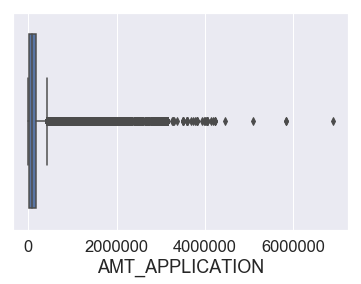

In [85]:
sns.boxplot(df_2['AMT_APPLICATION'])

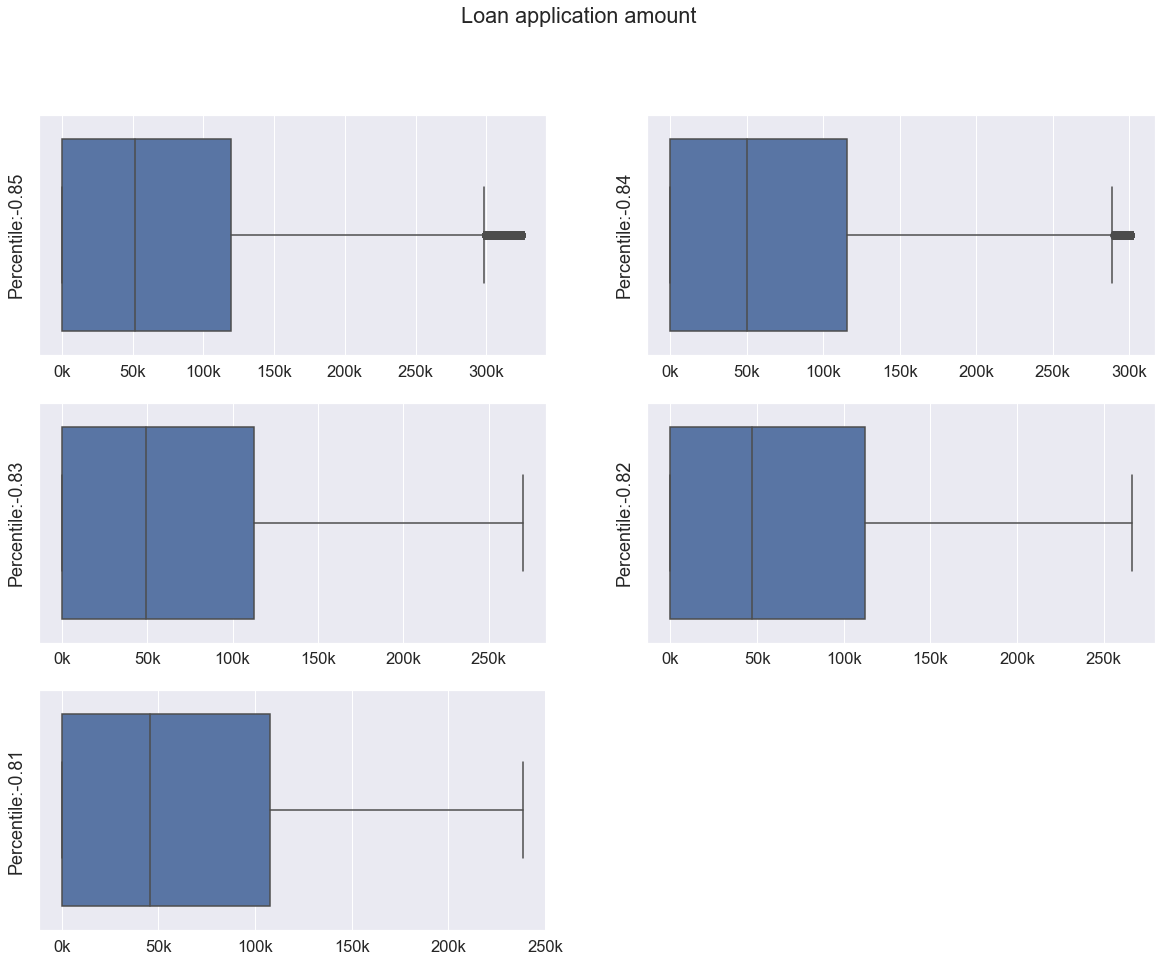

In [86]:
plt.figure(figsize=(20, 15))
j=1
sns.set(font_scale=1.5)
for i in range (85,80,-1):
    #plt.figure(j,figsize=[8,6])
    plt.subplot(3,2,j)
    p=df_2['AMT_APPLICATION'].quantile(i/100)
    g=sns.boxplot(x='AMT_APPLICATION',data=df_2.loc[df_2['AMT_APPLICATION']<=p,['AMT_APPLICATION']])
    plt.ylabel('Percentile:-{0}'.format(i/100))
    plt.xlabel('')
    plt.suptitle('Loan application amount')
    xlabels = ['{:,.0f}'.format(x) + 'k' for x in g.get_xticks()/1000]
    g.set_xticklabels(xlabels)
    j+=1

In [87]:
p=df_2['AMT_APPLICATION'].quantile(0.83)
df_2.shape[0]-df_2.loc[df_2['AMT_APPLICATION']<=p,['AMT_APPLICATION']].shape[0]

279174

In [88]:
df_2.loc[df_2['AMT_APPLICATION']>p,['AMT_APPLICATION']]=p
df_2['AMT_APPLICATION'].describe().apply(lambda x: format(x, '.2f'))

count    1670214.00
mean      104744.87
std        99275.18
min            0.00
25%        18720.00
50%        71046.00
75%       180360.00
max       270000.00
Name: AMT_APPLICATION, dtype: object

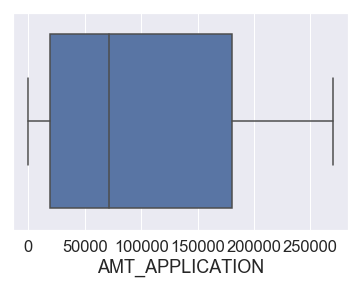

In [89]:
sns.boxplot(df_2['AMT_APPLICATION'])

Text(0.5, 1.0, 'Loan Application Amounts')

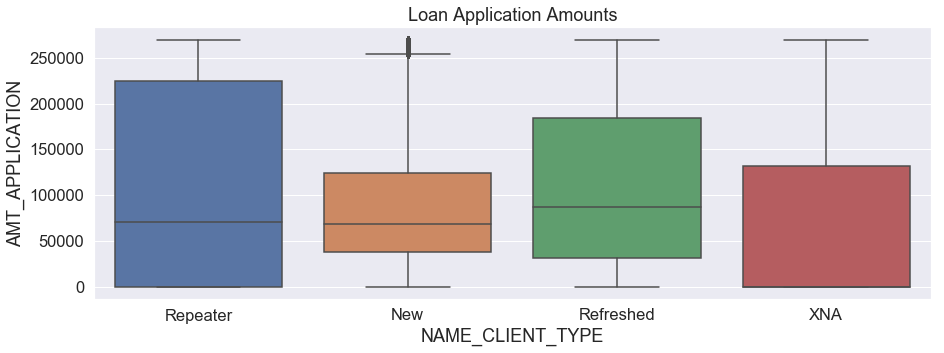

In [90]:
plt.figure(figsize=(15, 5))
#order=df_0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
sns.boxplot(y='AMT_APPLICATION',x='NAME_CLIENT_TYPE',data=df_2)
plt.title('Loan Application Amounts')

* Repeater and Refresher clients apply for the biggest loans.
* New clients generally apply for smaller amounts.

**How the client's were aquired?**

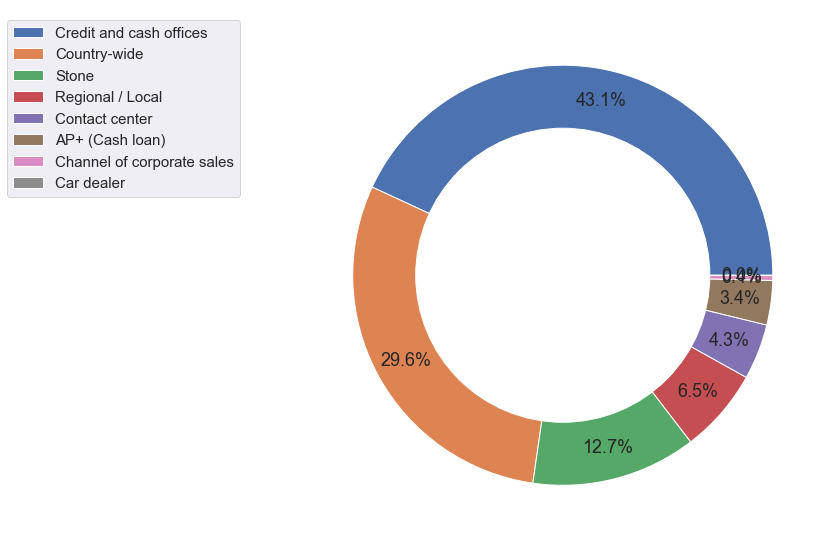

In [91]:
plt.figure(figsize=(20, 8))
#order=df_0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
count=df_2['CHANNEL_TYPE'].value_counts()
plt.pie(count,autopct='%1.1f%%',pctdistance=0.85)
#plt.xticks(rotation=90)
#plt.title('Target 0')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
plt.legend(count.index,loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)
p.gca().add_artist(my_circle)
plt.tight_layout()
plt.show()

* Most of the clients were acquired through Credit and cash offices, followed by Country-wide offices.

## Conclusion

The basic purpose of this notebook was to perform Exploratory data analysis on the datasets to make sure we understood what kind of data we are dealing with and what to expect with the model. First of all, there were a lot of missing values in the dataset- some of which we could impute- but a lot which we cannot handle, and hence had to be dropped. Then in the case of numerical columns, outliers emerged as the biggest challenge. When the percentage of outliers were few, we either capped them or removed them.
Once the data quality issues were addressed, we performed a very basic EDA to try and analyse the relationships between the variables and its trends. In order to make proper comparisons, we had to bin some numerical fields, change the scale of analysis to percentages and convert days to years for some date fields. The results of the study can be seen along with the plots.
The general outline of how we proceeded with the problems are follows:
1.  Loading the current_application data-set.
2.  Data examination and addressing of the data quality issues.(Missing values and Outliers)
3.  Categorical Binning of Numerical Fields. 
4.  Basic plotting and analyis of several Categorical and Numerical fields which we considered has the highest importance in the dataset.
5.  Analysing the data imbalance issue with the current_application dataset.
6.  Finding the most correlated variables.
7.  Loading previous_application data-set.
8.  Merging the 2 datasets.
9.  Simple plots and analysis on the previous_application data-set.